In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv("Richarson_Weather_Data.csv")
#data.head()
data = data[['DATE','TMIN', 'TMAX']]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print data.shape

(4923, 3)


In [2]:
## Slice dataset in according to months

def apply_MonthSlicing(date, monthstring):
    if date.strip().split("-")[1] == monthstring:
        return True
    else:
        return False

MonthData_Dict = {}
months = range(1,13)
for month in months:
    MonthData_Dict[month] = data[data['DATE'].apply(apply_MonthSlicing, monthstring=str(month).zfill(2))]
    MonthData_Dict[month].reset_index(drop=True, inplace=True)
print MonthData_Dict[1].head()
MonthData_Dict[12].shape

         DATE  TMIN  TMAX
0  2007-01-01  31.0  50.0
1  2007-01-02  29.0  53.0
2  2007-01-03  29.0  54.0
3  2007-01-04  44.0  57.0
4  2007-01-05  47.0  68.0


(406, 3)

In [8]:
## Adding moving average of TMAX and TMIN in the original and month-sliced dataframes
## We are allowing averages of atleast 30 entries or more


data["AV_TMAX"] = data["TMAX"].expanding(min_periods = 30).mean()
data["AV_TMIN"] = data["TMIN"].expanding(min_periods = 30).mean()
print data.tail(5)

for month in months:
    MonthData_Dict[month]["AV_TMAX"] = MonthData_Dict[month]["TMAX"].expanding(min_periods = 30).mean()
    MonthData_Dict[month]["AV_TMIN"] = MonthData_Dict[month]["TMIN"].expanding(min_periods = 30).mean()

print MonthData_Dict[12].tail(20)

            DATE  TMIN  TMAX    AV_TMAX    AV_TMIN
4918  2019-12-08  48.0  68.0  76.649522  56.639561
4919  2019-12-09  37.0  67.0  76.647561  56.635569
4920  2019-12-11  29.0  52.0  76.642552  56.629953
4921  2019-12-12  36.0  55.0  76.638155  56.625762
4922  2019-12-29  35.0  55.0  76.633760  56.621369


/home/avik/Software/AnaConda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/avik/Software/AnaConda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


           DATE  TMIN  TMAX    AV_TMAX    AV_TMIN
386  2018-12-19  50.0  61.0  57.093023  37.366925
387  2018-12-20  45.0  59.0  57.097938  37.386598
388  2018-12-21  37.0  58.0  57.100257  37.385604
389  2018-12-22  42.0  65.0  57.120513  37.397436
390  2018-12-23  38.0  56.0  57.117647  37.398977
391  2018-12-24  33.0  60.0  57.125000  37.387755
392  2018-12-25  54.0  63.0  57.139949  37.430025
393  2018-12-26  53.0  65.0  57.159898  37.469543
394  2018-12-27  38.0  63.0  57.174684  37.470886
395  2018-12-28  32.0  46.0  57.146465  37.457071
396  2018-12-29  34.0  41.0  57.105793  37.448363
397  2018-12-30  33.0  39.0  57.060302  37.437186
398  2018-12-31  39.0  60.0  57.067669  37.441103
399  2019-12-04  40.0  68.0  57.095000  37.447500
400  2019-12-05  49.0  71.0  57.129676  37.476309
401  2019-12-08  48.0  68.0  57.156716  37.502488
402  2019-12-09  37.0  67.0  57.181141  37.501241
403  2019-12-11  29.0  52.0  57.168317  37.480198
404  2019-12-12  36.0  55.0  57.162963  37.476543


['2006-12-01', '2007-12-10', '2008-12-19', '2009-12-28', '2011-12-06', '2012-12-17', '2013-12-26', '2015-12-05', '2016-12-14', '2017-12-23', '2019-12-05']


([<matplotlib.axis.XTick at 0x7f8e858b5e50>,
 <a list of 11 Text xticklabel objects>)

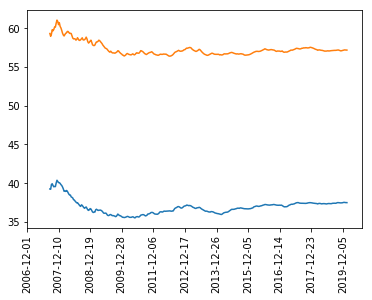

In [13]:
## Now Let's make some plots! How does the moving average of December's TMAX and TMIN look like

from matplotlib import pyplot as plt

xticks = MonthData_Dict[12][MonthData_Dict[12].index % 40 == 0]["DATE"]
print list(xticks)
plt.plot(MonthData_Dict[12]["DATE"], MonthData_Dict[12]["AV_TMIN"], label="T_min")
plt.plot(MonthData_Dict[12]["DATE"], MonthData_Dict[12]["AV_TMAX"], label="T_max")
plt.xticks(list(xticks), rotation = 90)
plt.show()

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[39.193548387096776, 36.12903225806452, 34.16129032258063, 32.70967741935483, 37.87096774193548, 38.25806451612903, 38.93103448275862, 30.666666666666668, 42.225806451612904, 41.29032258064517, 38.61290322580645, 37.45161290322581, 39.166666666666664, 39.142857142857146]
[58.935483870967744, 58.25806451612903, 57.935483870967744, 50.45161290322581, 58.32258064516129, 55.67741935483871, 59.44827586206897, 53.3, 56.516129032258064, 62.774193548387096, 57.483870967741936, 56.54838709677419, 56.233333333333334, 62.285714285714285]


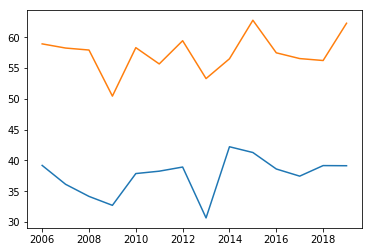

In [21]:
## Now Let's make plots of average December TMAX and TMIN as a function of year

Years = []
Av_TMin = []
Av_TMax = []
N_Entries = []

for ii in range(MonthData_Dict[12].shape[0]):
    this_year = int(MonthData_Dict[12].iloc[ii]["DATE"][0:4])
    if this_year not in Years: 
        Years.append(this_year)
        Av_TMin.append(0.)
        Av_TMax.append(0.)
        N_Entries.append(0)
    index = Years.index(this_year)
    N_Entries[index] += 1
    Av_TMin[index] = ( Av_TMin[index]*(N_Entries[index] - 1) + MonthData_Dict[12].iloc[ii]["TMIN"] ) / N_Entries[index]
    Av_TMax[index] = ( Av_TMax[index]*(N_Entries[index] - 1) + MonthData_Dict[12].iloc[ii]["TMAX"] ) / N_Entries[index]

print Years
print Av_TMin
print Av_TMax

plt.plot(Years, Av_TMin, label="T_Min")
plt.plot(Years, Av_TMax, label="T_Max")

plt.show()
